# 15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

boston_data = load_boston()
data = pd.DataFrame(data = boston_data['data'],columns = boston_data['feature_names'])
print(data.shape)
data.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## (a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor

ZN    -0.0739  0.0000


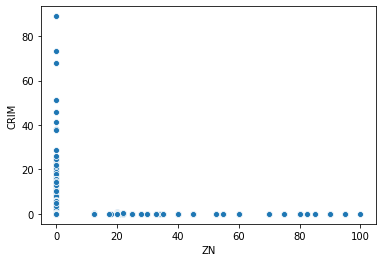

INDUS    0.5098  0.0000


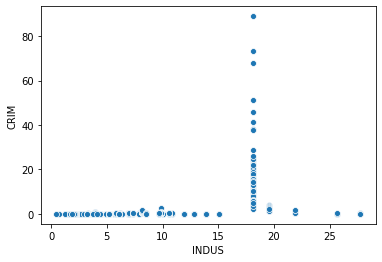

CHAS    -1.8928  0.2094


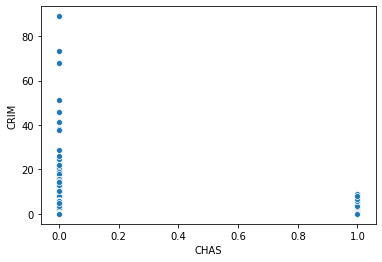

NOX    31.2485  0.0000


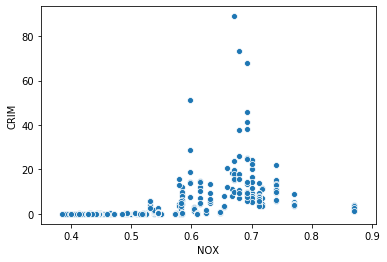

RM    -2.6841  0.0000


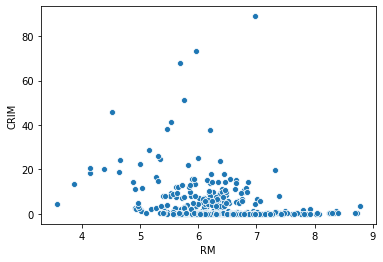

AGE    0.1078  0.0000


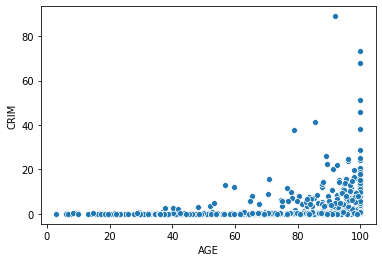

DIS    -1.5509  0.0000


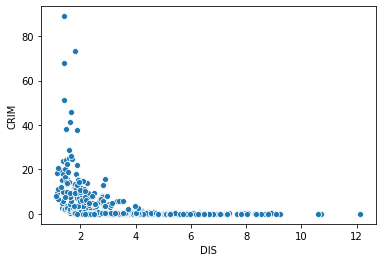

RAD    0.6179  0.0000


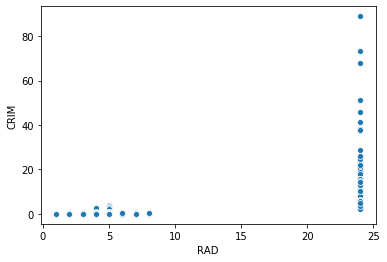

TAX    0.0297  0.0000


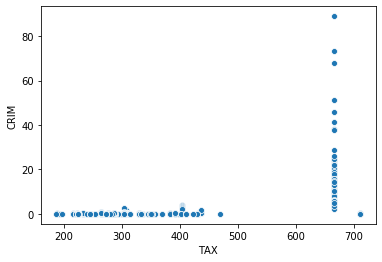

PTRATIO    1.1520  0.0000


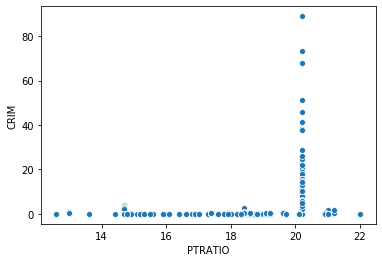

B    -0.0363  0.0000


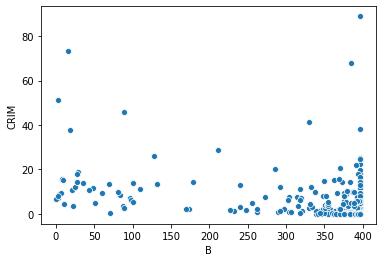

LSTAT    0.5488  0.0000


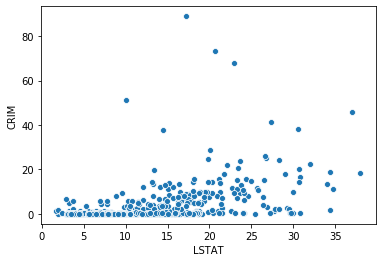

In [3]:
simple_coeff = []
import statsmodels.formula.api as smf
predictor = [col for col in data.columns if col != 'CRIM']
for col in predictor:
    result = smf.ols('CRIM ~ {}'.format(col),data = data).fit()
    print('{}    {:.4f}  {:.4f}'.format(col,result.params[col],result.pvalues[col]))
    simple_coeff.append(result.params[col])
    sns.scatterplot(data[col],data['CRIM'])
    plt.show()

In [4]:
# from above point, we can conclude that every predictor except CHAS, has a significant relation with CRIMv

## (b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

In [5]:
sum_predictor = ' + '.join(predictor)
result = smf.ols('CRIM ~ {}'.format(sum_predictor),data = data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     32.55
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           4.84e-55
Time:                        11:26:43   Log-Likelihood:                -1658.8
No. Observations:                 506   AIC:                             3344.
Df Residuals:                     493   BIC:                             3398.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9967      6.979      1.432      0.1

In [6]:
# although the coeff are all non zero, but inspecting the p values, we can only reject null hypothesis of RAD,DIS and LSTAT

## (c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis.

In [7]:

multi_coeff = [result.params[col] for col in predictor]

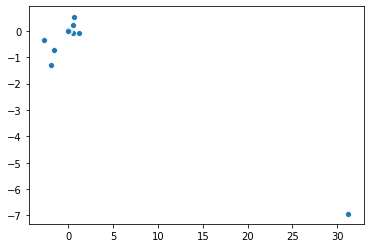

In [8]:

sns.scatterplot(simple_coeff,multi_coeff)

## (d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form¶
### Y = β0 + β1X + β2X2 + β3X3 + epsilon

In [9]:
for col in predictor:
    print(col)
    result = smf.ols('CRIM ~ {0} + np.power({0},2) + np.power({0},3)'.format(col),data = data).fit()
    print(result.summary())
    print()
    print('--------------------------------------------------------------------------------------------')
    print()

ZN
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.28e-06
Time:                        11:26:44   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.8461      0.433  

strong multicollinearity or other numerical problems.

--------------------------------------------------------------------------------------------

RM
                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.17
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.07e-07
Time:                        11:26:44   Log-Likelihood:                -1788.6
No. Observations:                 506   AIC:                             3585.
Df Residuals:                     502   BIC:                             3602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           1.35e-26
Time:                        11:26:44   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.2010      2